# Exercise 1: Solving a Tridiagonal System of Equations

## Introduction 
In this notebook, we will solve a tridiagonal system of equations using a custom implementation of a tridiagonal matrix solver. We will compare the efficiency of this custom solver with numpy's built-in functions for matrix inversion and solving linear systems. The goal is to understand the performance differences between these methods.

Let’s get started by setting up the problem.

## Problem description

In this exercise, we are tasked with solving a tridiagonal system of linear equations using a custom algorithm and comparing its performance with standard methods provided by numpy. A tridiagonal matrix is a special type of square matrix that has non-zero elements only on the main diagonal, the diagonal just above it, and the diagonal just below it. Such systems are common in numerical methods, particularly in the discretization of differential equations.

### Tridiagonal system representation
A tridiagonal system of equations can be expressed in matrix form as: $$ \bold{A} \bold{x} = \bold{r} $$
where **$A$** is an $n \times n $ tridiagonal matrix, **$x$** is the vector of unknowns we need to solve for, and **$r$** is the vector of the constants.

The matrix **$A$** has the following structure: 
$$

A = \begin{bmatrix}
d_1 & o_1 & 0 & \dots & 0 \\
u_1 & d_2 & o_2 & \ddots & \vdots \\
0 & u_2 & d_3 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & o_{n-1} \\
0 & \dots & 0 & u_{n-1} & d_n
\end{bmatrix}

$$

where $d_i$ are the elements on the main diagonal, $o_i$ are the elements on the diagonal above the main diagonal, and $u_i$ are the elements on the diagonal below the main diagonal.

The goal is to implement a custom solver function `TridiagonalSolver(d, o, u, r)` that efficiently solves this system by taking advantage of the tridiagonal structure of matrix **$A$**.

### Methodology
To solve the tridiagonal system, we will use the Thomas algorithm, a simplified form of Gaussian elimination that is optimized for tridiagonal matrices. This algorithm involves two main steps.

First, in the forward elimination step, the coefficients of the matrix are modified to convert it into an upper triangular form. This simplification allows us to handle the system more easily in the subsequent step.

Next, in the backward substitution step, we solve for the unknowns starting from the last equation and substitute the known values back into the previous equations. This method efficiently computes the solution by leveraging the structure of the tridiagonal matrix.

After implementing the custom solver, we will compare its performance with standard methods, including matrix inversion using `numpy.linalg.inv` and direct solution using `numpy.linalg.solve`.

Finally, we will measure the computational time required by each method for different sizes of the matrix. This analysis will help us understand the efficiency of each approach and provide insights into their practical applications.

### Objective
In summary, the primary objective of this exercise is to:

1. Develop an efficient algorithm tailored to solving tridiagonal systems.
2. Understand the computational advantages of using specialized algorithms over general-purpose solvers.
3. Gain insights into the trade-offs between different numerical methods when solving linear systems of varying sizes.

## Implementation
### Step 1: Custom tridiagonal solver
We begin by implementing the custom tridiagonal solver using the Thomas algorithm. This solver will efficiently handle the tridiagonal structure of the matrix by performing forward elimination and backward substitution.

In [2]:
import numpy as np

def TridiagonalSolver(d, o, u, r):
    n = len(d)
    # Forward elimination
    for i in range(1, n):
        w = u[i-1] / d[i-1]
        d[i] -= w*o[i-1]
        r[i] -= w*r[i-1]
    
    # Back substitution
    x = np.zeros_like(r)
    x[-1] = r[-1] / d[-1]
    for i in range(n-2, -1, -1):
        x[i] = (r[i] - o[i]*x[i+1]) / d[i]
    
    return x

This code defines the `TridiagonalSolver` function, which accepts the main diagonal `d`, the upper diagonal `o`, the lower diagonal `u`, and the right-hand side vector `r`. It outputs the solution vector `x` by applying the forward elimination and backward substitution steps.

### Step 2: Generating a tridiagonal system
Next, we need to generate a tridiagonal system to test our solver. This function creates random tridiagonal matrices and a corresponding right-hand side vector.

In [3]:
def generate_tridiagonal_system(n):
    d = np.random.rand(n)
    o = np.random.rand(n-1)
    u = np.random.rand(n-1)
    r = np.random.rand(n)
    return d, o, u, r

This helper function will allow us to easily create test cases of varying sizes to evaluate the performance of the solver.

### Step 3: Performance comparison
Now, we will write functions to measure the time taken by the custom solver, as well as numpy's `linalg.inv` and `linalg.solve` methods, for solving the same tridiagonal system.

In [4]:
import time

def time_custom_solver(n):
    d, o, u, r = generate_tridiagonal_system(n)
    start_time = time.time()
    TridiagonalSolver(d, o, u, r)
    end_time = time.time()
    return end_time - start_time

def time_numpy_solve(n):
    d, o, u, r = generate_tridiagonal_system(n)
    A = np.diag(d) + np.diag(o, 1) + np.diag(u, -1)
    start_time = time.time()
    np.linalg.solve(A, r)
    end_time = time.time()
    return end_time - start_time

def time_numpy_inv(n):
    d, o, u, r = generate_tridiagonal_system(n)
    A = np.diag(d) + np.diag(o, 1) + np.diag(u, -1)
    start_time = time.time()
    np.linalg.inv(A).dot(r)
    end_time = time.time()
    return end_time - start_time

These functions measure the execution time of each method, allowing us to compare their computational efficiency.

### Step 4: Visualizing the results
Finally, we will plot the computation times for different matrix sizes to visually compare the performance of each method.

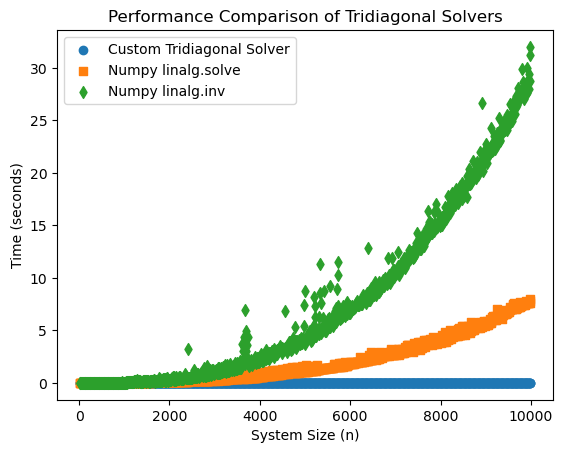

In [10]:
import matplotlib.pyplot as plt

# Define a range of system sizes
system_sizes = np.arange(10, 5000, 10)
times_custom = [time_custom_solver(n) for n in system_sizes]
times_solve = [time_numpy_solve(n) for n in system_sizes]
times_inv = [time_numpy_inv(n) for n in system_sizes]

# Plotting the performance comparison
plt.figure()
plt.scatter(system_sizes, times_custom, label='Custom Tridiagonal Solver', marker='o')
plt.scatter(system_sizes, times_solve, label='Numpy linalg.solve', marker='s')
plt.scatter(system_sizes, times_inv, label='Numpy linalg.inv', marker='d')
plt.xlabel('System Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison of Tridiagonal Solvers')
plt.legend()
plt.show()

This code will generate a plot showing the computation times for different system sizes, highlighting the differences in efficiency between the custom solver and the standard numpy methods.

### Conclusion

In this exercise, we implemented and compared three different methods for solving a tridiagonal system of linear equations: a custom Tridiagonal Solver using the Thomas algorithm, matrix inversion using `numpy.linalg.inv`, and direct solution using `numpy.linalg.solve`.

The custom Tridiagonal Solver demonstrated significant efficiency advantages due to its tailored approach for tridiagonal matrices. The Thomas algorithm, which has a time complexity of $O(n)$, efficiently handles the tridiagonal structure by performing forward elimination and backward substitution in linear time. This makes it highly suitable for large systems where computational efficiency is critical.

In contrast, the matrix inversion method using `numpy.linalg.inv` has a time complexity of $O(n^3)$, as it involves calculating the inverse of the matrix. This method is computationally expensive and less efficient for large matrices, as evidenced by the increasing computation times observed in our experiments.

The direct solution method using `numpy.linalg.solve` is more optimized than matrix inversion, with a time complexity of approximately $O(n^2)$ for dense matrices. However, it does not exploit the sparse structure of the tridiagonal matrix, resulting in slower performance compared to the custom Tridiagonal Solver.

Overall, the results highlight the importance of choosing the right algorithm based on the problem's structure and size. For tridiagonal systems, the Thomas algorithm is the clear winner in terms of efficiency, providing fast and accurate solutions with minimal computational overhead. Understanding these differences in time complexity helps in making informed decisions in numerical simulations, especially when dealing with large-scale problems in scientific computing.